### Name: Emilly Murugi Njue

## **BUSINESS OVERVIEW**

#### INTRODUCTION
SyriaTel is a telecommunications company facing the challenge of customer churn, which refers to customers discontinuing their services or switching to a competitor. To minimize financial losses and improve customer retention, SyriaTel aims to develop a classifier that can predict whether a customer is likely to churn in the near future. By identifying predictable patterns in customer behavior, SyriaTel can implement targeted strategies to retain valuable customers.

#### BUSINESS PROBLEM
The business problem at hand is to build a classifier capable of predicting whether a customer will "soon" stop doing business with SyriaTel. This binary classification problem is crucial for SyriaTel to proactively address customer churn and reduce its financial impact.

#### OBJECTIVES
1. To identify patterns in customer behavior that indicate a likelihood of churn.
2. To determine the specific factors that contribute to customer churn in the telecommunications industry.
3. To predict which customers are likely to churn in the near future with a high degree of accuracy.
4. To develop a classifier model that assists in predicting customer churn and improving customer retention rates.


In [39]:
import pandas as pd

data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Data Understanding

In [40]:
#Get the column names
print("Column names: ")
print()
print(data.columns)

Column names: 

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [41]:
# Get unique count for each variable
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [42]:
#Get data types of each column
print("Data types: ")
print()
print(data.dtypes)

Data types: 

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [43]:
# Check for missing values
print("Missing values: ")
print()
print(data.isna().sum())

Missing values: 

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [44]:
#Check for duplicated rows
print("Duplicated rows: ", data.duplicated().sum())

Duplicated rows:  0


##### This dataset has no missing values and duplicates.

In [45]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [46]:
#Drop irrelevant columns
data.drop(['phone number', 'account length'], axis=1, inplace=True)
data

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [47]:
categorical_columns = data.select_dtypes(include=['object', 'bool'])

# Print the list of categorical columns
print("Categorical Columns:")
for column in categorical_columns:
    print(column)


Categorical Columns:
state
international plan
voice mail plan
churn


In [48]:
#Check unique values in the categorical columns
print("Churn Column values: ")
print()
print(data['churn'].value_counts())
print()
print()

print("Voice Mail Plan Column values: ")
print()
print(data['voice mail plan'].value_counts())
print()
print()

print("International Plan Column values: ")
print()
print(data['international plan'].value_counts())


Churn Column values: 

False    2850
True      483
Name: churn, dtype: int64


Voice Mail Plan Column values: 

no     2411
yes     922
Name: voice mail plan, dtype: int64


International Plan Column values: 

no     3010
yes     323
Name: international plan, dtype: int64


In [49]:
#Convert the categorical columns (Churn, Voice mail plan and International plan) to numerical columns using Scikit Learn OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder

cat_columns = ['international plan', 'voice mail plan', 'churn']

#Instantiate the OrdinalEncoder
encoder = OrdinalEncoder()

#Fit and transform the categorical columns
encoded_data = encoder.fit_transform(data[cat_columns])

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=cat_columns)

# Replace the original categorical columns with the encoded columns in the original DataFrame
data[cat_columns] = encoded_df

data

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0
1,OH,415,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0
2,NJ,415,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0
3,OH,408,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0
4,OK,415,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,0.0,1.0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0.0
3329,WV,415,0.0,0.0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0.0
3330,RI,510,0.0,0.0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0.0
3331,CT,510,1.0,0.0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0.0


## Exploratory Data Analysis

In [50]:
# Check amounts of '0' and '1' in column 'Churn'
print("Proportion of Churn")
print(data["churn"].value_counts())

Proportion of Churn
0.0    2850
1.0     483
Name: churn, dtype: int64


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

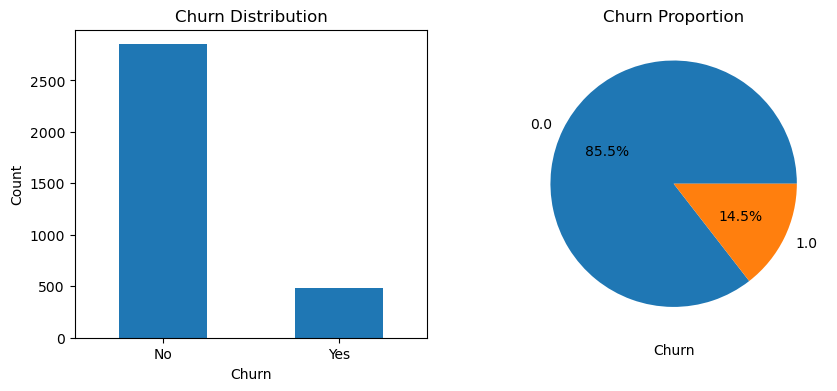

In [52]:
fig, (ax_bar, ax_pie) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#Bar Chart for churn
churn_counts = data['churn'].value_counts()

churn_counts.plot(kind='bar', ax=ax_bar)
ax_bar.set_xlabel('Churn')
ax_bar.set_ylabel('Count')
ax_bar.set_xticklabels(['No', 'Yes'], rotation='horizontal')
ax_bar.set_title('Churn Distribution')

#Pie chart for churn
churn_counts = data['churn'].value_counts()
ax_pie.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%')
ax_pie.set_xlabel('Churn')
ax_pie.set_title('Churn Proportion')

plt.show()


About 15% of the customers have churned. So the baseline model could be to predict that 15% of the customers will churn. Given 15% is a small number, we need to ensure that the chosen model does predict with great accuracy this 15% as it is of interest to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

### Function to visualize the columns

In [53]:
def visualize_column(column):
    column_counts = data[column].value_counts()

    fig, (ax_bar, ax2_bar, ax_pie) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    # Bar chart
    ax_bar.bar(column_counts.index, column_counts.values)
    ax_bar.set_xlabel(column)
    ax_bar.set_ylabel('Count')
    ax_bar.set_xticks([0, 1])
    ax_bar.set_title(f'Distribution of {column}')

    # Bar chart for churn vs. column
    grouped_data = data.groupby([column, 'churn']).size().unstack()
    grouped_data.plot(kind='bar', ax=ax2_bar)
    ax2_bar.set_xlabel(column)
    ax2_bar.set_ylabel('Count')
    ax2_bar.set_xticklabels(grouped_data.index, rotation='horizontal')
    ax2_bar.set_title(f'Churn Distribution by {column}')

    # Pie chart
    ax_pie.pie(column_counts.values, labels=column_counts.index, autopct='%1.1f%%')
    ax_pie.set_xlabel(column)
    ax_pie.set_title(f'Proportion of Customers by {column}')

    plt.tight_layout()
    plt.show()


#### 1. International Plan column

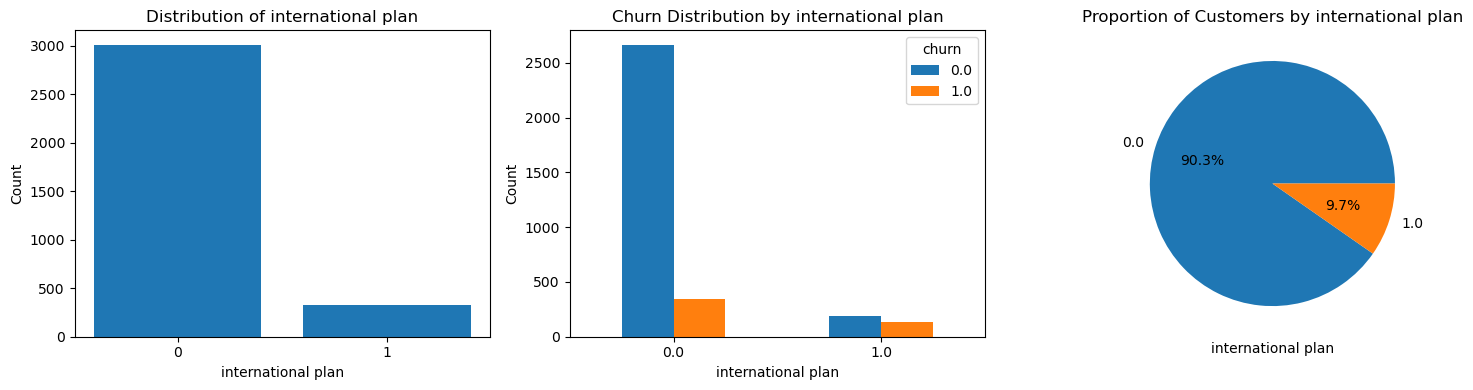

In [54]:
visualize_column('international plan')


#### 
- Customers without the international plan are more (90%) compared to those without the plan (10%).
- On comparing the customer who churned based on whether they had the plan or not, it is seen that those without churn more compared to those with the plan

#### 2. Voice Mail Plan

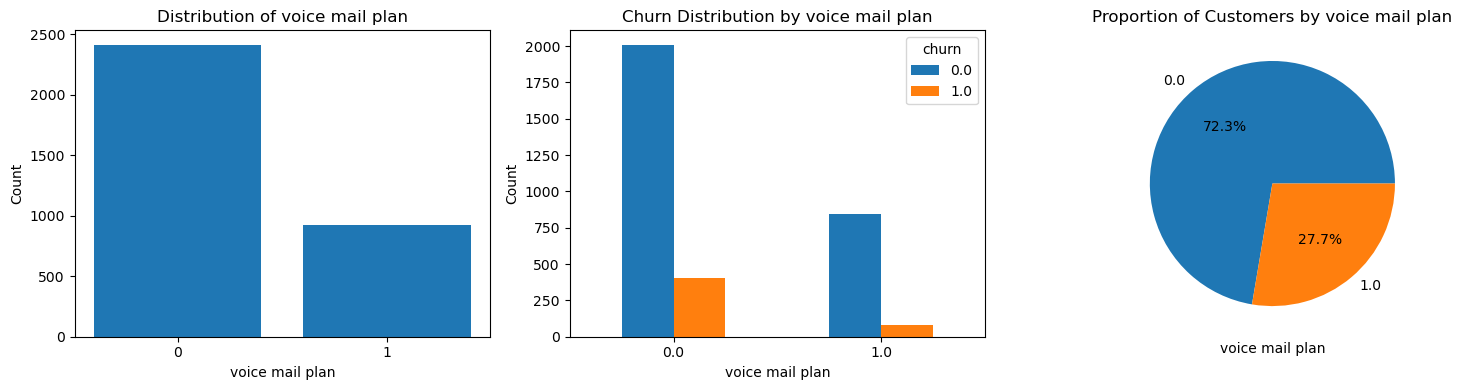

In [55]:

visualize_column('voice mail plan')



#### 
- Few of the customers have subscribed to the voice mail plan (28%).
- It is observed that the customers without the plan churn more compared to the with the voice mail plan.

#### 3. Area Code

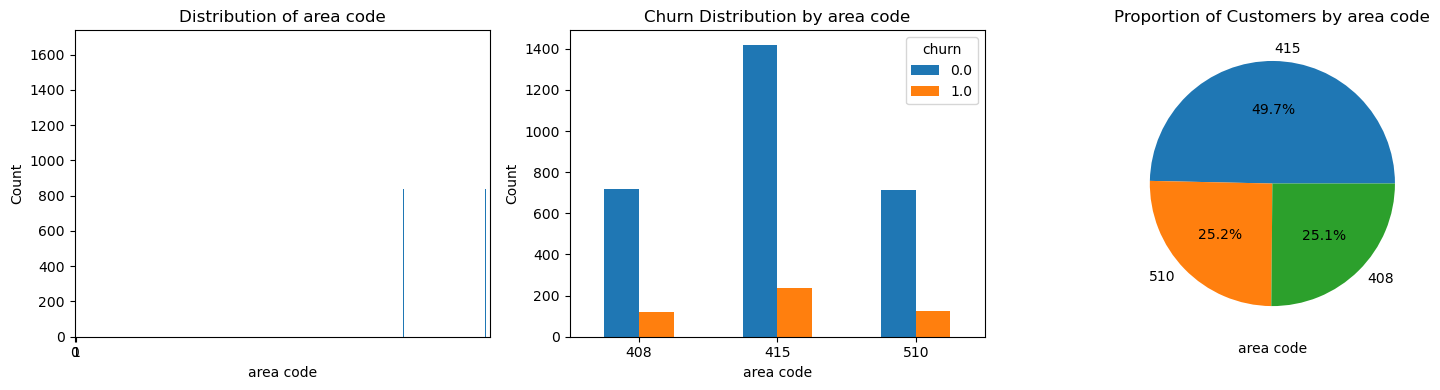

In [56]:
visualize_column('area code')

####
- Most of the customers are from area code 415.

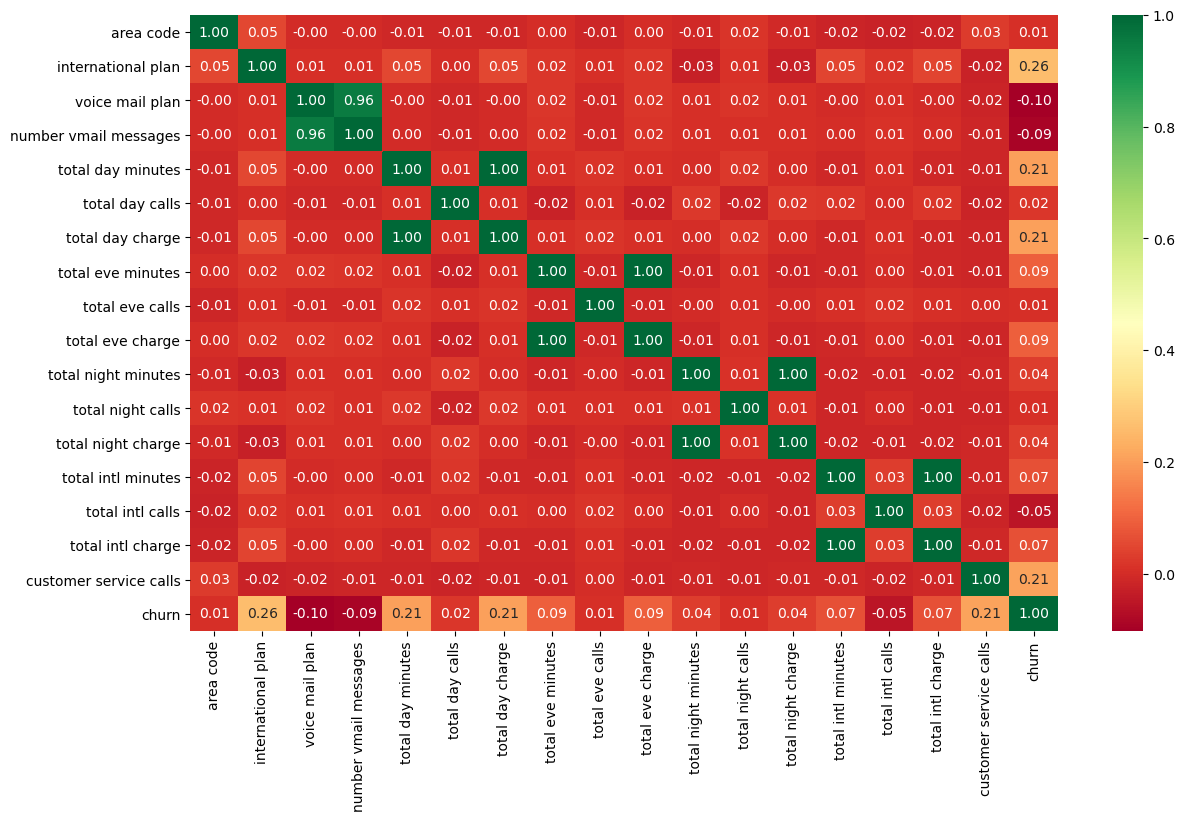

In [57]:
# Heatmap
data_corr = data.corr()
f, ax = plt.subplots(figsize=(14, 8))

sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='RdYlGn', ax=ax)
plt.show()

In [58]:
# Use "Spearman correlation" for the "Churn" column
print("Spearman Correlations with Churn")
print(data.corr(method="spearman")["churn"])

Spearman Correlations with Churn
area code                 0.003257
international plan        0.259852
voice mail plan          -0.102148
number vmail messages    -0.095358
total day minutes         0.170677
total day calls           0.026311
total day charge          0.170677
total eve minutes         0.088592
total eve calls           0.008578
total eve charge          0.088580
total night minutes       0.034343
total night calls         0.004694
total night charge        0.034353
total intl minutes        0.060850
total intl calls         -0.074758
total intl charge         0.060850
customer service calls    0.136657
churn                     1.000000
Name: churn, dtype: float64
